In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re, json
from collections import defaultdict

## Carga de datos

### Twitter

In [25]:
twitter_path = 'Data/Twitter/Twitter_Data.csv'
twitter_data = pd.read_csv(twitter_path)
twitter_data

/var/folders/2h/91q4sd4x3t13f8n_dy5nkj_00000gn/T/ipykernel_3116/2898866676.py:2: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  twitter_data = pd.read_csv(twitter_path)


,n_replies,text,text_clean,text_lemma,Topic_label,id,body_words,all_body_words,Distinctly.Emotoinal,Distinctly.Moral,...,party,ACount_unq,MCount_unq,shared,posCount_unq,shared_pos,negCount_unq,shared_neg,channel,day
0,1388,"Over 1,100,000 people killed by guns in the US...",people killed guns usa since @johnlennon shot ...,people kill gun usa since @johnlennon shoot ki...,Gun Control,1.0,11,20,0,0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,Twitter,2015-12-01
1,762,"Over 1,100,000 people killed by guns in the US...",people killed guns usa since @johnlennon shot ...,people kill gun usa since @johnlennon shoot ki...,Gun Control,2.0,11,20,0,0,...,NaN,0.0,0.0,2.0,0.0,0.0,0.0,2.0,Twitter,2015-12-01
2,748,If liberals won't punish an entire religion fo...,liberals punish entire religion actions insist...,liberal punish entire religion action insist p...,Gun Control,3.0,9,23,0,1,...,1.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,Twitter,2015-12-01
3,436,"""@JenniferJJacobs: Trump: ""Protect the 2nd ame...",@jenniferjjacobs trump protect 2nd amendment w...,@jenniferjjacobs trump protect 2nd amendment w...,Gun Control,4.0,10,17,1,1,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Twitter,2015-12-01
4,342,Kurt Russell put gun control activists on blas...,kurt russell put gun control activists blast r...,kurt russell put gun control activist blast re...,Gun Control,5.0,9,14,0,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Twitter,2015-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986680,2809,On the International Day Against Homophobia an...,international day homophobia transphobia recom...,international day homophobia transphobia recom...,Clinton_feed,10673679.0,11,19,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter,5/17/2016
986681,2079,Today<U+2019>s #RNCinCLE theme: <U+201C>Law an...,today' #rncincle theme law order,today' #rncincle theme law order,Clinton_feed,10673680.0,5,6,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter,7/18/2016
986682,600,We've come too far to let Republicans take us ...,come far let republicans take us back commit v...,come far let republican take us back commit vo...,Clinton_feed,10673681.0,11,19,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter,1/27/2016
986683,1712,Trump says he hires the best people. This is w...,trump says hires best people means,trump say hire good people mean,Clinton_feed,10673682.0,6,13,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter,8/20/2016


In [3]:
twitter_data.columns

Index(['n_replies', 'text', 'text_clean', 'text_lemma', 'Topic_label', 'id',
       'body_words', 'all_body_words', 'Distinctly.Emotoinal',
       'Distinctly.Moral', 'emo_neg', 'emo_pos', 'Moral.emotional', 'Neutral',
       'authority.vice', 'authority.virtue', 'care.vice', 'care.virtue',
       'fairness.vice', 'fairness.virtue', 'loyalty.vice', 'loyalty.virtue',
       'moral_all', 'MoralityGeneral', 'sanctity.vice', 'sanctity.virtue',
       'vice', 'virtue', 'Distinctly.Emotoinal.y', 'Distinctly.Moral.y',
       'emo_neg.y', 'emo_pos.y', 'Moral.emotional.y', 'Neutral.y',
       'authority.vice.y', 'authority.virtue.y', 'care.vice.y',
       'care.virtue.y', 'fairness.vice.y', 'fairness.virtue.y',
       'loyalty.vice.y', 'loyalty.virtue.y', 'moral_all.y',
       'MoralityGeneral.y', 'sanctity.vice.y', 'sanctity.virtue.y', 'vice.y',
       'virtue.y', 'user.verified', 'url', 'media', 'followers', 'topic',
       'src_id', 'ideology', 'hasIdeo', 'party_mean', 'party', 'ACount_unq',

In [4]:
twitter_data["text"][0]

'Over 1,100,000 people killed by guns in the USA since @JohnLennon was shot and killed on Dec 8 1980\r\n#StopGunViolence https://t<U+2026>'

In [ ]:
twitter_data["text_clean"][0]

'Over 1,100,000 people killed by guns in the USA since @JohnLennon was shot and killed on Dec 8 1980\r\n#StopGunViolence https://t<U+2026>'

In [9]:
twitter_data["text_lemma"][0]

'people kill gun usa since @johnlennon shoot kill dec #stopgunviolence https'

In [12]:
twitter_data[["n_replies"]].describe()

,n_replies
count,986685.000000
mean,1087.989355
std,3242.786507
min,0.000000
25%,0.000000
50%,2.000000
75%,298.000000
max,543692.000000


In [14]:
twitter_data["Topic_label"].unique()

array(['Gun Control', 'Same-sex Marriage', 'Climate Change',
       'Trump elections', 'Women March', 'Post Brexit', 'Mueller Report',
       'MeToo', 'Trump_feed', 'Clinton_feed'], dtype=object)

In [15]:
twitter_data["Topic_label"].value_counts()

Topic_label
MeToo                393135
Climate Change       235548
Mueller Report       229046
Gun Control           48394
Same-sex Marriage     29058
Post Brexit           17998
Women March           15000
Trump elections        9001
Trump_feed             4794
Clinton_feed           4711
Name: count, dtype: int64

## Moral Foundations Dictionary

In [5]:
lines = Path("moral_foundations_dictionary/Moral Foundations Dictionary.wmodel").read_text(encoding="utf-8", errors="ignore").splitlines()

# Encabezados como "CARE.VIRTUE" o "SANCTITY.VICE"
cat_re  = re.compile(r'^\s*([A-Z]+)\.(VIRTUE|VICE)\s*$')
# Términos como "ALTRUISM (1)" (ignora comentarios/otros)
term_re = re.compile(r'^\s*([^\s#;].*?)\s*\(\d+\)\s*$')

mfd = defaultdict(lambda: {"virtue": [], "vice": []})
current = None  # (foundation, valence)

for line in lines:
    m = cat_re.match(line)
    if m:
        foundation = m.group(1).lower()   # care, fairness, ...
        valence    = m.group(2).lower()   # virtue / vice
        current = (foundation, valence)
        continue

    if current:
        t = term_re.match(line)
        if t:
            term = t.group(1).strip()
            mfd[current[0]][current[1]].append(term)

with open("mfd_canonical.json", "w", encoding="utf-8") as f:
    json.dump(mfd, f, ensure_ascii=False, indent=2)


### lista total de palabras morales

In [6]:
with open("moral_foundations_dictionary/mfd_canonical.json", encoding="utf-8") as f:
    mfd = json.load(f)

# Lista completa de palabras (todas las categorías y valencias)
moral_words = sorted({t for v in mfd.values() for terms in v.values() for t in terms})


In [7]:
moral_words

['ABHOR',
 'ABHORRED',
 'ABHORS',
 'ABSTINANCE',
 'ABSTINENCE',
 'ABUSED',
 'ABUSER',
 'ABUSERS',
 'ABUSES',
 'ABUSING',
 'ACHE',
 'ACHED',
 'ACHES',
 'ACHING',
 'ACHINGLY',
 'ACQUIESCE',
 'ACQUIESCED',
 'ACQUIESCENT',
 'ACQUIESCES',
 'ACQUIESCING',
 'ADDICT',
 'ADDICTED',
 'ADDICTING',
 'ADDICTION',
 'ADDICTIONS',
 'ADDICTS',
 'ADHERE',
 'ADHERED',
 'ADHERENCE',
 'ADHERES',
 'ADHERING',
 'ADMIRAL',
 'ADMIRALS',
 'ADULTERER',
 'ADULTERERS',
 'ADULTEROUS',
 'ADULTERY',
 'AFFLICT',
 'AFFLICTED',
 'AFFLICTION',
 'AFFLICTIONS',
 'AFFLICTS',
 'AGAINST_US',
 'AGONIZE',
 'AGONIZED',
 'AGONIZING',
 'AGONIZINGLY',
 'AGONY',
 'ALCOHOLIC',
 'ALCOHOLICS',
 'ALCOHOLISM',
 'ALLAH',
 'ALLEGIANCE',
 'ALLEGIANCES',
 'ALLEGIANT',
 'ALLEVIATE',
 'ALLEVIATED',
 'ALLEVIATES',
 'ALLEVIATING',
 'ALLEVIATION',
 'ALLIED',
 'ALLIES',
 'ALLY',
 'ALL_FOR_ONE',
 'ALMIGHTY',
 'ALTRUISM',
 'ALTRUIST',
 'AM_PARTIAL',
 'ANARCHIST',
 'ANARCHISTIC',
 'ANARCHISTS',
 'ANARCHY',
 'ANGEL',
 'ANGUISH',
 'ANGUISHED',
 'ANGUIS

In [8]:
"HELLO" in moral_words

False

In [9]:
"SHOULD" in moral_words

False

In [21]:
"MUST" in moral_words

False

In [10]:
"PRESIDENT" in moral_words

True

In [11]:
"HEALTH" in moral_words

True

In [12]:
"INTEGRITY" in moral_words

True

In [13]:
len(moral_words)

2041

### por categorías

In [14]:
# 1) Diccionario por FOUNDATION (unifica virtue y vice)
by_foundation = {
    foundation: sorted({t for terms in valences.values() for t in terms})
    for foundation, valences in mfd.items()
}

# 2) Diccionario por PAIR (foundation.valence)
by_pairs = {
    f"{foundation}.{valence}": sorted(set(terms))
    for foundation, valences in mfd.items()
    for valence, terms in valences.items()
}

# (Opcional) Controles rápidos
print("FOUNDATIONS:", {k: len(v) for k, v in by_foundation.items()})
print("PAIRS:", {k: len(v) for k, v in by_pairs.items()})

FOUNDATIONS: {'care': 464, 'fairness': 351, 'loyalty': 192, 'authority': 431, 'sanctity': 660}
PAIRS: {'care.virtue': 182, 'care.vice': 288, 'fairness.virtue': 115, 'fairness.vice': 236, 'loyalty.virtue': 143, 'loyalty.vice': 49, 'authority.virtue': 301, 'authority.vice': 130, 'sanctity.virtue': 272, 'sanctity.vice': 388}


In [15]:
sum([len(v) for _, v in by_foundation.items()])

2098

In [16]:
foundations_total_list = []
for word_list in [list(v) for _, v in by_foundation.items()]:
    foundations_total_list += word_list



In [17]:
len(np.unique(foundations_total_list))

2041

### Conteo de palabras morales

In [18]:
twitter_data

,n_replies,text,text_clean,text_lemma,Topic_label,id,body_words,all_body_words,Distinctly.Emotoinal,Distinctly.Moral,...,party,ACount_unq,MCount_unq,shared,posCount_unq,shared_pos,negCount_unq,shared_neg,channel,day
0,1388,"Over 1,100,000 people killed by guns in the US...",people killed guns usa since @johnlennon shot ...,people kill gun usa since @johnlennon shoot ki...,Gun Control,1.0,11,20,0,0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,Twitter,2015-12-01
1,762,"Over 1,100,000 people killed by guns in the US...",people killed guns usa since @johnlennon shot ...,people kill gun usa since @johnlennon shoot ki...,Gun Control,2.0,11,20,0,0,...,NaN,0.0,0.0,2.0,0.0,0.0,0.0,2.0,Twitter,2015-12-01
2,748,If liberals won't punish an entire religion fo...,liberals punish entire religion actions insist...,liberal punish entire religion action insist p...,Gun Control,3.0,9,23,0,1,...,1.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,Twitter,2015-12-01
3,436,"""@JenniferJJacobs: Trump: ""Protect the 2nd ame...",@jenniferjjacobs trump protect 2nd amendment w...,@jenniferjjacobs trump protect 2nd amendment w...,Gun Control,4.0,10,17,1,1,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,Twitter,2015-12-01
4,342,Kurt Russell put gun control activists on blas...,kurt russell put gun control activists blast r...,kurt russell put gun control activist blast re...,Gun Control,5.0,9,14,0,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Twitter,2015-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986680,2809,On the International Day Against Homophobia an...,international day homophobia transphobia recom...,international day homophobia transphobia recom...,Clinton_feed,10673679.0,11,19,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter,5/17/2016
986681,2079,Today<U+2019>s #RNCinCLE theme: <U+201C>Law an...,today' #rncincle theme law order,today' #rncincle theme law order,Clinton_feed,10673680.0,5,6,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter,7/18/2016
986682,600,We've come too far to let Republicans take us ...,come far let republicans take us back commit v...,come far let republican take us back commit vo...,Clinton_feed,10673681.0,11,19,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter,1/27/2016
986683,1712,Trump says he hires the best people. This is w...,trump says hires best people means,trump say hire good people mean,Clinton_feed,10673682.0,6,13,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Twitter,8/20/2016


In [36]:
def moral_counter(tokens, moral_words):
    return sum([1 if token in moral_words else 0 for token in tokens])

In [21]:
import nltk
from nltk import bigrams
# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer

In [27]:
twitter_data["text_lemma"].astype(str).values

array(['people kill gun usa since @johnlennon shoot kill dec #stopgunviolence https',
       'people kill gun usa since @johnlennon shoot kill dec #stopgunviolence https',
       'liberal punish entire religion action insist punish gun owner',
       ...,
       'come far let republican take us back commit vote caucus hillary',
       'trump say hire good people mean',
       'help small business succeed policy personal'],
      shape=(986685,), dtype=object)

In [30]:
docs = twitter_data["text_lemma"].astype(str).values

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].upper()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

In [32]:
docs[0]

['PEOPLE',
 'KILL',
 'GUN',
 'USA',
 'SINCE',
 'JOHNLENNON',
 'SHOOT',
 'KILL',
 'DEC',
 'STOPGUNVIOLENCE',
 'HTTPS']

In [44]:
twitter_data["message_len"] = [len(doc) for doc in docs]
twitter_data["moral_counter"] = [moral_counter(doc, moral_words) for doc in docs]
twitter_data["moral_freq"] = twitter_data["moral_counter"] / twitter_data["message_len"]

In [52]:
#twitter_plots_data = twitter_data[twitter_data["Topic_label"] == 'Gun Control'].copy()
twitter_plots_data = twitter_data.copy()

/opt/miniconda3/envs/capstone-project/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


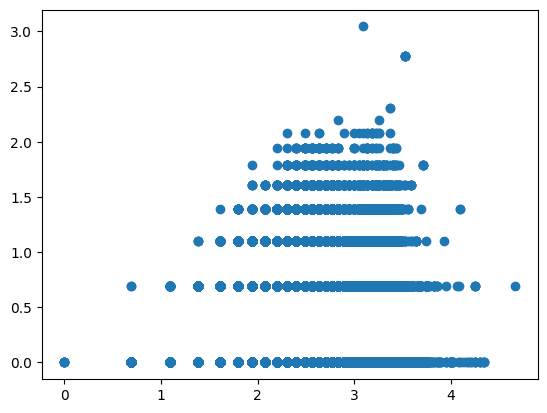

In [53]:
plt.scatter(np.log(twitter_plots_data["message_len"]), np.log(twitter_plots_data["moral_counter"]))

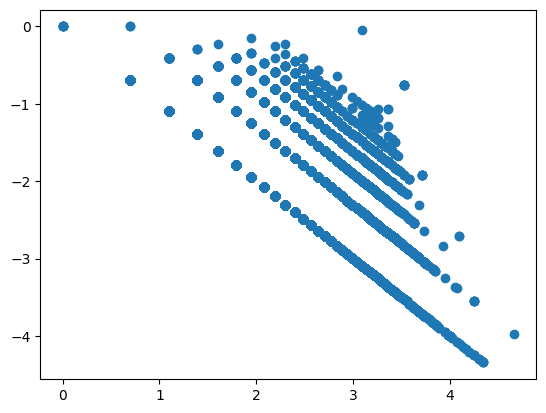

In [54]:
plt.scatter(np.log(twitter_plots_data["message_len"]), np.log(twitter_plots_data["moral_freq"]))

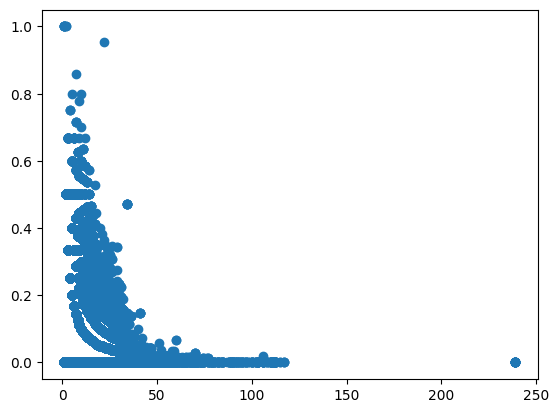

In [56]:
plt.scatter(twitter_plots_data["message_len"], twitter_plots_data["moral_freq"])

/opt/miniconda3/envs/capstone-project/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


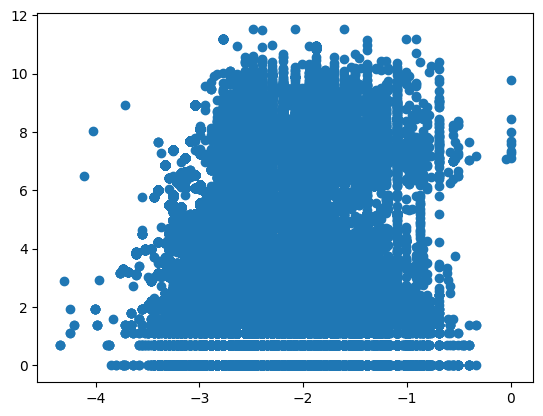

In [59]:
plt.scatter(np.log(twitter_plots_data["moral_freq"]), np.log(twitter_plots_data["n_replies"]))

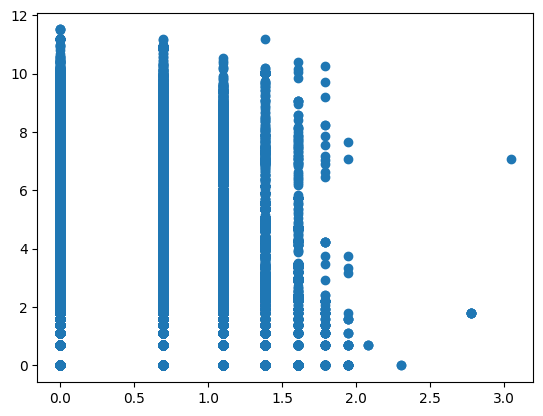

In [60]:
plt.scatter(np.log(twitter_plots_data["moral_counter"]), np.log(twitter_plots_data["n_replies"]))